##### "In modern vehicles, brake systems are monitored by multiple sensors like brake pressure, wheel speeds, pad wear levels, ABS status, and fluid temperature. The goal of this project is to use this sensor data to identify whether there is a fault in the brake system.
##### By building a predictive model in preventive maintenance, reduce road accidents, and improve vehicle safety."

### Vehicle Brake System Fault Detection

#####  Main Theme:"Using machine learning techniques to detect faults in a vehicle's braking system to improve safety, enable predictive maintenance, and reduce the risk of accidents."



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\91879\Downloads\vehicle_brake_fault_dataset.csv")

In [71]:
print(df.describe())


       Brake_Pressure  Pad_Wear_Level    ABS_Status  Wheel_Speed_FL  \
count    62629.000000    62629.000000  62629.000000    62629.000000   
mean       100.023292        0.500292      0.448243       60.006362   
std          9.509283        0.094752      0.497318        4.730358   
min         55.343961        0.053703      0.000000       37.717203   
25%         94.112952        0.441565      0.000000       57.050642   
50%        100.023292        0.500292      0.000000       60.006362   
75%        105.963011        0.558542      1.000000       62.962061   
max        144.790843        0.920203      1.000000       84.007573   

       Wheel_Speed_FR  Wheel_Speed_RL  Wheel_Speed_RR  Fluid_Temperature  \
count    62629.000000    62629.000000    62629.000000       62629.000000   
mean        59.998142       60.009911       59.999104          89.969616   
std          4.750688        4.740220        4.767575           4.731463   
min         39.703976       39.874946       39.686231   

In [3]:
df["Fault"].value_counts()

Fault
0    53307
1     9322
Name: count, dtype: int64

#### Brake_Pressure 60 to 130 PSI in this range only
#### Pad_Wear_Level > 1 is an error
#### Fluid_Temperature Good range: -20°C to 150°C
#### Pedal_Position 0 to 100 (or 0–1)

In [4]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [5]:
df["Pedal_Position"].agg(["max","min"])

max    0.999979
min    0.000031
Name: Pedal_Position, dtype: float64

In [6]:
col = "Wheel_Speed_FL"  
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
print(outliers)

707      75.793176
906      74.665437
1076     76.850760
1272     46.183078
1354     74.043649
           ...    
61799    44.183171
62000    74.259729
62301    75.743882
62387    45.733247
62391    46.369081
Name: Wheel_Speed_FL, Length: 415, dtype: float64


In [7]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

######  Brake_Pressure: How hard the brakes are being applied.
###### Pad_Wear_Level : How worn out the brake pads are
###### ABS_Status : Whether the Anti-lock Braking System (ABS) is active.
###### Wheel_Speed_FR : Speed of the Front Right wheel.
###### Wheel_Speed_RL : Speed of the Rear Left wheel.
###### Wheel_Speed_RR : Speed of the Rear Right wheel.
###### Fluid_Temperature :  Temperature of the brake fluid (Higher temperature = brakes might overheat and become less effective.)
###### Pedal_Position :


#### Fault is target variable 

##### Fault = 1  fault detected (problem present)
##### Fault = 0  system is normal (no problem)

##### Normal range: 30–120 PSI for air brake systems
##### Anything above 150 PSI may indicate a fault or abnormal condition

In [8]:
df.head(2)

,Brake_Pressure,Pad_Wear_Level,ABS_Status,Wheel_Speed_FL,Wheel_Speed_FR,Wheel_Speed_RL,Wheel_Speed_RR,Fluid_Temperature,Pedal_Position,Fault
0,104.967142,0.658791,0.0,60.243966,64.073339,64.173293,52.779920,NaN,0.721824,0
1,98.617357,0.363352,0.0,50.805666,62.510148,57.761404,52.207206,90.97122,0.520359,0


In [9]:
sum(df["Pad_Wear_Level"]==0.363352)

0

In [10]:
df.isnull().sum()

Brake_Pressure       6263
Pad_Wear_Level       6263
ABS_Status           6263
Wheel_Speed_FL       6263
Wheel_Speed_FR       6263
Wheel_Speed_RL       6263
Wheel_Speed_RR       6263
Fluid_Temperature    6263
Pedal_Position       6263
Fault                   0
dtype: int64

In [11]:
df["Brake_Pressure"].agg(["max","min"])

max    144.790843
min     55.343961
Name: Brake_Pressure, dtype: float64

In [12]:
x=df.drop("Fault",axis=1)

y=df["Fault"]


In [13]:
df

,Brake_Pressure,Pad_Wear_Level,ABS_Status,Wheel_Speed_FL,Wheel_Speed_FR,Wheel_Speed_RL,Wheel_Speed_RR,Fluid_Temperature,Pedal_Position,Fault
0,104.967142,0.658791,0.0,60.243966,64.073339,64.173293,52.779920,NaN,0.721824,0
1,98.617357,0.363352,0.0,50.805666,62.510148,57.761404,52.207206,90.971220,0.520359,0
2,106.476885,0.400152,0.0,54.526314,64.716102,60.688568,53.322908,89.698445,0.033706,1
3,115.230299,0.781691,1.0,61.330578,56.177756,58.223006,59.644416,95.134251,0.311474,0
4,97.658466,0.603683,0.0,NaN,NaN,56.646720,64.197682,94.734924,0.266101,0
...,...,...,...,...,...,...,...,...,...,...
62624,103.579240,0.593574,1.0,64.113416,51.078601,56.721124,62.657686,91.665799,0.641589,1
62625,110.669710,0.679117,0.0,65.723943,61.234084,63.234430,57.047823,87.941524,0.857053,1
62626,115.130966,0.563712,0.0,59.864722,61.012391,66.658508,67.118830,85.242921,NaN,0
62627,90.777819,0.760030,1.0,63.502512,47.147196,66.222673,61.648972,92.597048,0.346314,0


In [14]:
df.shape

(62629, 10)

In [15]:
import missingno

In [16]:
df["Brake_Pressure"].mean()

np.float64(100.02329245552279)

In [17]:
df["Brake_Pressure"] = df["Brake_Pressure"].fillna(df["Brake_Pressure"].mean())

In [18]:
df["Pad_Wear_Level"] = df["Pad_Wear_Level"].fillna(df["Pad_Wear_Level"].mean())

In [19]:
df["ABS_Status"] = df["ABS_Status"].fillna(df["ABS_Status"].mode()[0])

In [20]:
df["Wheel_Speed_FR"] = df["Wheel_Speed_FR"].fillna(df["Wheel_Speed_FR"].mean())

In [21]:
df["Wheel_Speed_FL"] = df["Wheel_Speed_FL"].fillna(df["Wheel_Speed_FL"].mean())

In [22]:
df["Pad_Wear_Level"] = df["Pad_Wear_Level"].fillna(df["Pad_Wear_Level"].mean())

In [23]:
df["Wheel_Speed_RL"] = df["Wheel_Speed_RL"].fillna(df["Wheel_Speed_RL"].mean())

In [24]:
df["Wheel_Speed_RR"] = df["Wheel_Speed_RR"].fillna(df["Wheel_Speed_RR"].mean())

In [25]:
df["Fluid_Temperature"] = df["Fluid_Temperature"].fillna(df["Fluid_Temperature"].mean())

In [26]:
df["Pedal_Position"] = df["Pedal_Position"].fillna(df["Pedal_Position"].mean())

In [27]:
df.isna().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
Fault                0
dtype: int64

In [28]:
colms=["Brake_Pressure","Pad_Wear_Level","ABS_Status","Wheel_Speed_FL","Wheel_Speed_FR","Wheel_Speed_RL","Wheel_Speed_RR","Fluid_Temperature","Pedal_Position"]

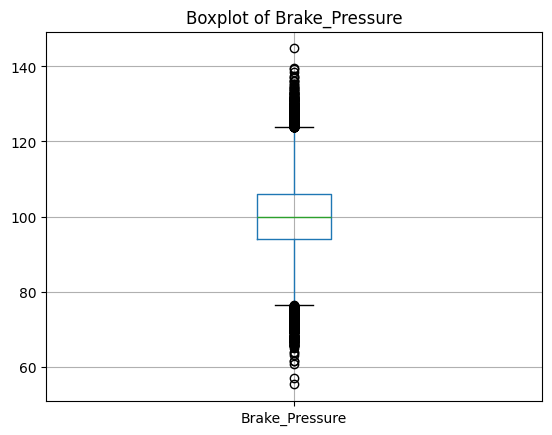

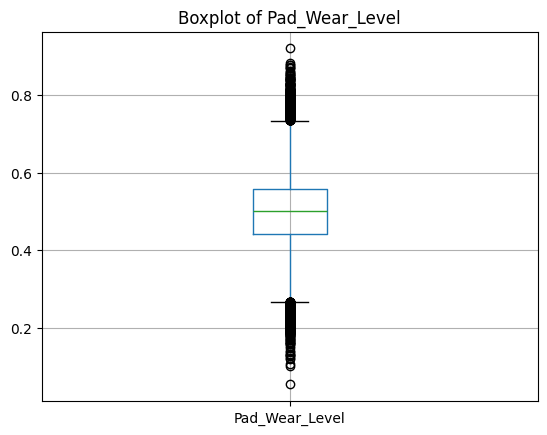

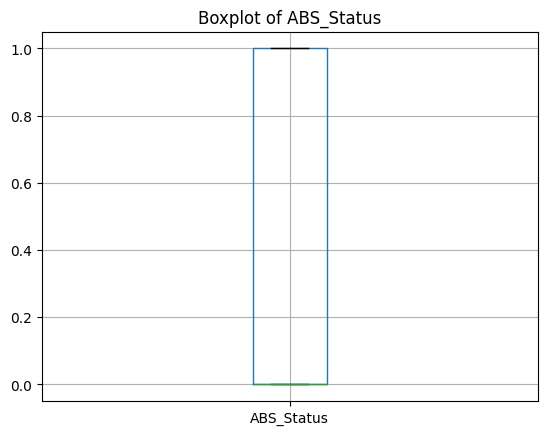

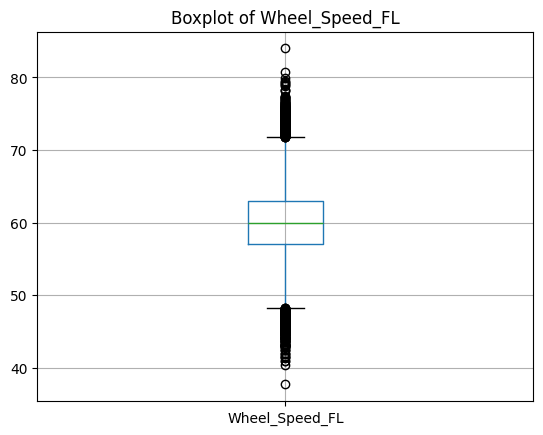

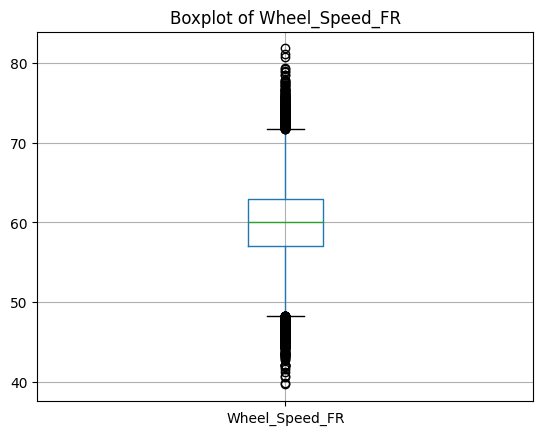

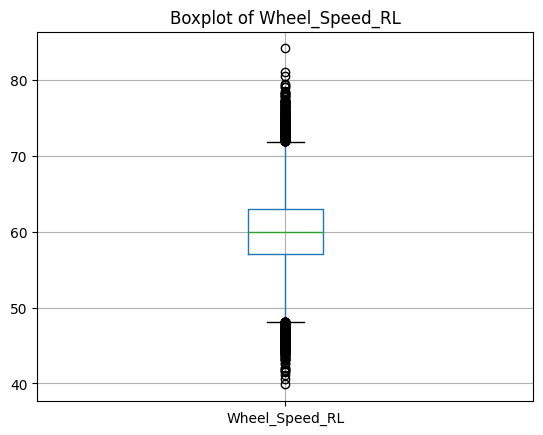

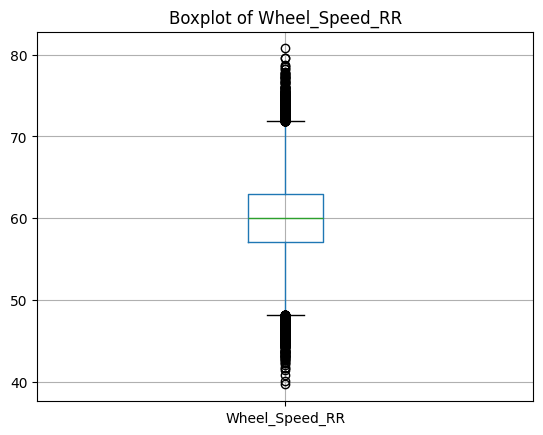

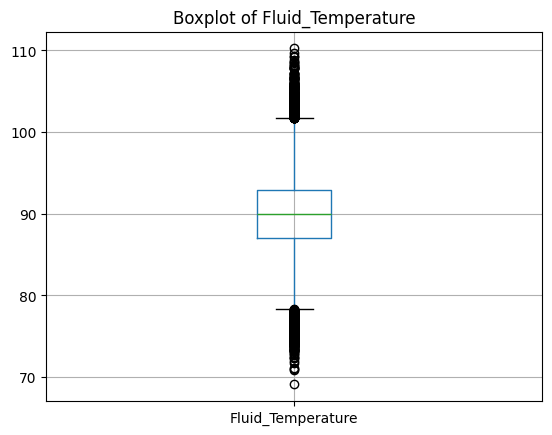

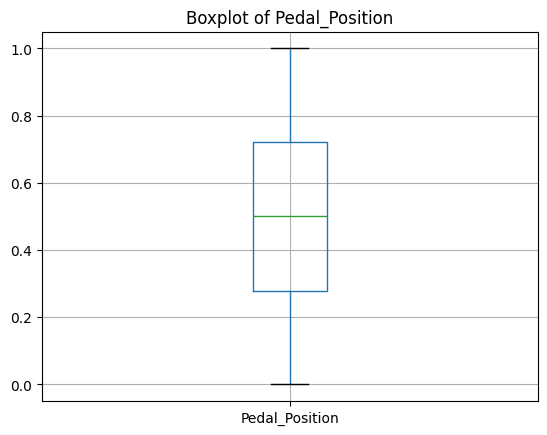

In [29]:
import matplotlib.pyplot as plt

for col in colms:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [30]:
import matplotlib.pyplot as plt

In [31]:
df["Pedal_Position"].plot(kind="box")

<Axes: >

In [32]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [33]:
col = "Brake_Pressure"  
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
print(outliers)

74        73.802549
113      124.632421
179      127.201692
209      138.527315
262       67.587327
            ...    
62320    129.990987
62341    123.928473
62380     75.254952
62560    127.225321
62628    129.030337
Name: Brake_Pressure, Length: 1019, dtype: float64


In [34]:
from feature_engine.outliers import ArbitraryOutlierCapper,OutlierTrimmer,Winsorizer

In [35]:
win = Winsorizer(capping_method = 'iqr',tail = 'both')

In [36]:
win

Winsorizer(capping_method='iqr', tail='both')

In [37]:
win.fit_transform(df[['Brake_Pressure']])

,Brake_Pressure
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466
...,...
62624,103.579240
62625,110.669710
62626,115.130966
62627,90.777819


In [38]:
arbitary = ArbitraryOutlierCapper(max_capping_dict ={"Brake_Pressure": 150},min_capping_dict={"Brake_Pressure": 60})

In [39]:
arbitary.fit_transform(df[["Brake_Pressure"]])

,Brake_Pressure
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466
...,...
62624,103.579240
62625,110.669710
62626,115.130966
62627,90.777819


In [40]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [41]:
df["Brake_Pressure"].min()

np.float64(55.34396136471123)

In [42]:
df['Brake_Pressure'].plot(kind="kde")

<Axes: ylabel='Density'>

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [45]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [46]:
x=df.drop("Fault",axis=1)
y=df["Fault"]

In [47]:
x

,Brake_Pressure,Pad_Wear_Level,ABS_Status,Wheel_Speed_FL,Wheel_Speed_FR,Wheel_Speed_RL,Wheel_Speed_RR,Fluid_Temperature,Pedal_Position
0,104.967142,0.658791,0.0,60.243966,64.073339,64.173293,52.779920,89.969616,0.721824
1,98.617357,0.363352,0.0,50.805666,62.510148,57.761404,52.207206,90.971220,0.520359
2,106.476885,0.400152,0.0,54.526314,64.716102,60.688568,53.322908,89.698445,0.033706
3,115.230299,0.781691,1.0,61.330578,56.177756,58.223006,59.644416,95.134251,0.311474
4,97.658466,0.603683,0.0,60.006362,59.998142,56.646720,64.197682,94.734924,0.266101
...,...,...,...,...,...,...,...,...,...
62624,103.579240,0.593574,1.0,64.113416,51.078601,56.721124,62.657686,91.665799,0.641589
62625,110.669710,0.679117,0.0,65.723943,61.234084,63.234430,57.047823,87.941524,0.857053
62626,115.130966,0.563712,0.0,59.864722,61.012391,66.658508,67.118830,85.242921,0.500437
62627,90.777819,0.760030,1.0,63.502512,47.147196,66.222673,61.648972,92.597048,0.346314


In [48]:
y

0        0
1        0
2        1
3        0
4        0
        ..
62624    1
62625    1
62626    0
62627    0
62628    0
Name: Fault, Length: 62629, dtype: int64

In [49]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from collections import Counter

In [50]:
ros=RandomOverSampler(random_state=29)

In [51]:
x_r,y_r=ros.fit_resample(x,y)

In [52]:
Counter(y_r)

Counter({0: 53307, 1: 53307})

In [53]:
pd.DataFrame(x).duplicated().sum()

np.int64(0)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

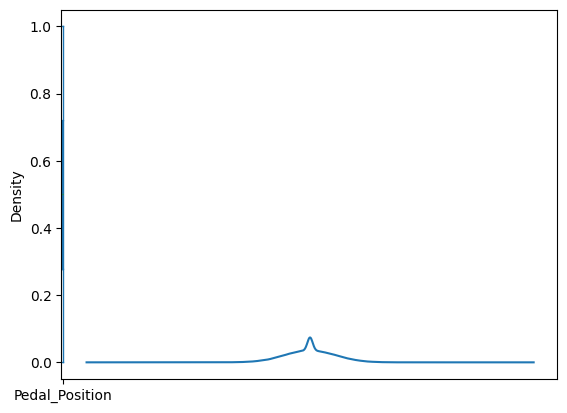

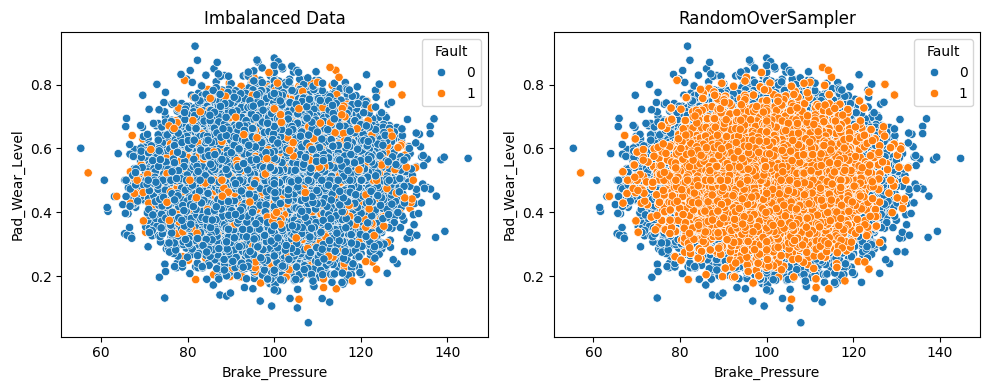

In [55]:

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("Imbalanced Data")
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y)

plt.subplot(122)
plt.title("RandomOverSampler")
sns.scatterplot(x=x_r.iloc[:, 0], y=x_r.iloc[:, 1], hue=y_r)

plt.tight_layout()
plt.show()


In [56]:
df.isnull().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
Fault                0
dtype: int64

In [57]:
df["Fault"].value_counts()

Fault
0    53307
1     9322
Name: count, dtype: int64

In [64]:
# Step 1: Fill missing values in df BEFORE splitting
df["Brake_Pressure"] = df["Brake_Pressure"].fillna(df["Brake_Pressure"].mean())
df["Pad_Wear_Level"] = df["Pad_Wear_Level"].fillna(df["Pad_Wear_Level"].mean())
df["ABS_Status"] = df["ABS_Status"].fillna(df["ABS_Status"].mean())
df["Wheel_Speed_FL"] = df["Wheel_Speed_FL"].fillna(df["Wheel_Speed_FL"].mean())
df["Wheel_Speed_FR"] = df["Wheel_Speed_FR"].fillna(df["Wheel_Speed_FR"].mean())
df["Wheel_Speed_RL"] = df["Wheel_Speed_RL"].fillna(df["Wheel_Speed_RL"].mean())
df["Wheel_Speed_RR"] = df["Wheel_Speed_RR"].fillna(df["Wheel_Speed_RR"].mean())
df["Fluid_Temperature"] = df["Fluid_Temperature"].fillna(df["Fluid_Temperature"].mean())
df["Pedal_Position"] = df["Pedal_Position"].fillna(df["Pedal_Position"].mean())

# Step 2: Define features and target
X = df.drop("Fault", axis=1)   # Replace with your actual target column
y = df["Fault"]

# Step 3: Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.8329873862366278


In [58]:
df["Brake_Pressure"] = df["Brake_Pressure"].fillna(df["Brake_Pressure"].mean())
df["Pad_Wear_Level"] = df["Pad_Wear_Level"].fillna(df["Pad_Wear_Level"].mean())
df["ABS_Status"] = df["ABS_Status"].fillna(df["ABS_Status"].mean())
df["Wheel_Speed_FL"] = df["Wheel_Speed_FL"].fillna(df["Wheel_Speed_FL"].mean())
df["Wheel_Speed_FR"] = df["Wheel_Speed_FR"].fillna(df["Wheel_Speed_FR"].mean())
df["Wheel_Speed_RL"] = df["Wheel_Speed_RL"].fillna(df["Wheel_Speed_RL"].mean())
df["Wheel_Speed_RR"] = df["Wheel_Speed_RR"].fillna(df["Wheel_Speed_RR"].mean())
df["Fluid_Temperature"] = df["Fluid_Temperature"].fillna(df["Fluid_Temperature"].mean())
df["Pedal_Position"] = df["Pedal_Position"].fillna(df["Pedal_Position"].mean())

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
## DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.7250518920645058

In [61]:
import pandas as pd
print(x.isna().sum())  # To check NaNs column-wise
print(x.isna().sum().sum())  # Total number of NaNs


Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
dtype: int64
0


In [62]:
x.isnull().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
dtype: int64

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8329873862366278


In [67]:
### KNN algorithm 
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8329873862366278

In [68]:
## naive_bayes
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
accuracy_score(y_test,y_pred)

0.8510298578955772

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [80]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy_score 0.8329873862366278
Precision: 0.17714285714285713
Recall: 0.03322615219721329
F1 Score: 0.05595667870036101


In [ ]:
from mlxtend.plotting import plot_learning_curves

In [ ]:
plot_learning_curves(x_train,
    y_train,
    x_test,
    y_test,knn,scoring='accuracy')


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
plot_learning_curves(x_train,
    y_train,
    x_test,
    y_test,nb,scoring='accuracy')


### naive_bayes is best model accuracy_score 0.8500718505508542

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("f1score:", f1_score(y_test, y_pred))

f1score: 0.0010712372790573112


In [70]:
print(df.describe())

       Brake_Pressure  Pad_Wear_Level    ABS_Status  Wheel_Speed_FL  \
count    62629.000000    62629.000000  62629.000000    62629.000000   
mean       100.023292        0.500292      0.448243       60.006362   
std          9.509283        0.094752      0.497318        4.730358   
min         55.343961        0.053703      0.000000       37.717203   
25%         94.112952        0.441565      0.000000       57.050642   
50%        100.023292        0.500292      0.000000       60.006362   
75%        105.963011        0.558542      1.000000       62.962061   
max        144.790843        0.920203      1.000000       84.007573   

       Wheel_Speed_FR  Wheel_Speed_RL  Wheel_Speed_RR  Fluid_Temperature  \
count    62629.000000    62629.000000    62629.000000       62629.000000   
mean        59.998142       60.009911       59.999104          89.969616   
std          4.750688        4.740220        4.767575           4.731463   
min         39.703976       39.874946       39.686231   

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f1_score(y_test, y_pred))


0.05595667870036101


In [ ]:
#df=pd.read_csv(r"C:\Users\91879\Downloads\vehicle_brake_fault_dataset.csv")
#df.columns

In [ ]:
#df.isna().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#numeric_cols=['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault']

In [ ]:
#x=df.drop('Fault',axis=1)
#y=df['Fault']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
#numeric_transformer=Pipeline(steps=[("mean imputation",SimpleImputer(strategy='mean')),
                                 ("feature scaling",StandardScaler()),
                                 ("feature transformation",PowerTransformer())])
#numeric_transformer

In [ ]:
#final_transfomer=ColumnTransformer([('numeric_transformer',numeric_transformer,numeric_cols)])
#final_transfomer

In [ ]:
#model=Pipeline([('data preprocessing',final_transfomer),
                ("algorithm",DecisionTreeClassifier())])

In [ ]:
#model

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
norm=MinMaxScaler()

In [ ]:
features = ['Brake_Pressure', 'Pad_Wear_Level', 'Pedal_Position',
            'Fluid_Temperature', 'Wheel_Speed_FL']

In [ ]:
aa

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
df[features] = norm.fit_transform(df[features])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb,x, y, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)